# Session 3 : Supervised learning (2/3)

## Preliminaries

Run the script `datasets.py` like you did in the last notebook to load the functions used to generate artificial datasets.

In [1]:
%run datasets.py

## Linear Models for classification

In [2]:
# use the make_forge() function to generate a set of 500 points X and
# their labels y for classification
X, y = make_forge(n_samples=500)

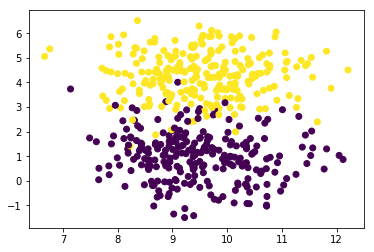

In [3]:
# this snippet prints the points on a 2d space
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

As we can see, the dataset does not seem to be linearly separable. We are going to use a logistic regression model to create a classifier. Add the missing pieces of code to create a model and train it. Print its accuracy.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.linear_model import LogisticRegression
def fit_and_score(model_class, X_train, X_test, y_train, y_test, *args, **kwargs):
    model = model_class(*args, **kwargs)
    model.fit(X_train, y_train)
    print("building {} model with {} parameters:".format(model_class.__name__, len(args) + len(kwargs)),
          *["arg {} = {}".format(i, args[i]) for i in range(len(args))],
          *["{} = {}".format(kwarg, kwargs[kwarg]) for kwarg in kwargs])
    print(" | score on train set:", model.score(X_train, y_train))
    print(" | score on test set:", model.score(X_test, y_test))
    return model
model = fit_and_score(LogisticRegression, X_train, X_test, y_train, y_test)

building LogisticRegression model with 0 parameters:
 | score on train set: 0.946236559139785
 | score on test set: 0.9354838709677419


Now print the decision boundary of this model like we did in the last notebook. Save the image (with code or the button in the GUI) for future model comparison. Find also the number of misclassified examples by your model.

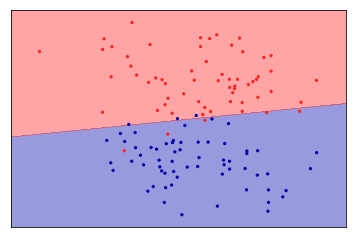

In [5]:
%run plots.py
plot_2d_separator(model, X_test, y_test, fill=True, eps=0.5, alpha=0.4)
plt.savefig("first_model_boundaries.png")

Linear models for classification can also have a regularization. Read the source code of `LogisticRegression` to find the parameter used to control the regularization. Create other models (at least 4) with different values for this parameter. Print the accuracy of each of your model, the number of misclassified examples and the decision boundary. Save the image for each model.

building LogisticRegression model with 1 parameters: C = 0.001
 | score on train set: 0.946236559139785
 | score on test set: 0.9193548387096774
 | there was 10 misclassified examples
building LogisticRegression model with 1 parameters: C = 0.01
 | score on train set: 0.9435483870967742
 | score on test set: 0.9354838709677419
 | there was 8 misclassified examples
building LogisticRegression model with 1 parameters: C = 0.1
 | score on train set: 0.9435483870967742
 | score on test set: 0.9354838709677419
 | there was 8 misclassified examples
building LogisticRegression model with 1 parameters: C = 1
 | score on train set: 0.946236559139785
 | score on test set: 0.9354838709677419
 | there was 8 misclassified examples
building LogisticRegression model with 1 parameters: C = 10
 | score on train set: 0.946236559139785
 | score on test set: 0.967741935483871
 | there was 4 misclassified examples
building LogisticRegression model with 1 parameters: C = 100
 | score on train set: 0.9462365

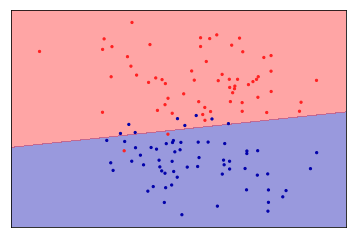

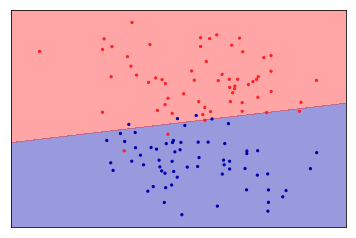

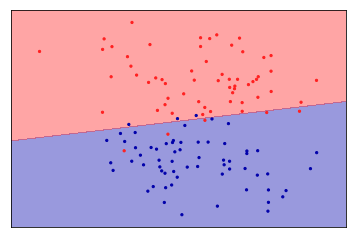

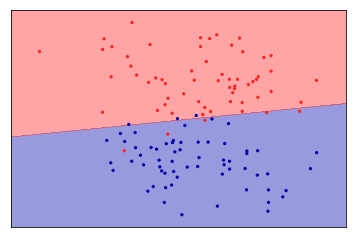

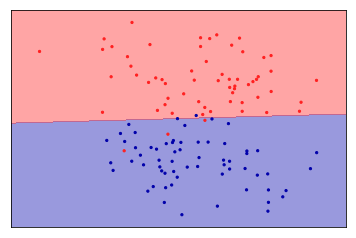

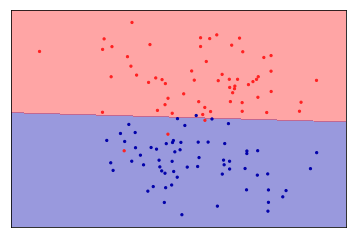

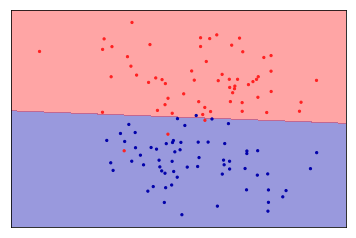

In [6]:
# Create some LogisticRegression() models with regularization
# Visualize their respective decision boundary
for C in [10**i for i in range(-3, 4)]:
    model = fit_and_score(LogisticRegression, X_train, X_test, y_train, y_test, C=C)
    s = model.score(X_test, y_test)
    print(" | there was {} misclassified examples".format(int(round((1-s)*len(X_test)))))
    plt.figure()
    plot_2d_separator(model, X_test, y_test, fill=True, eps=0.5, alpha=0.4)

Compare the images of decision boundaries you have saved. Can you see the influence of the regularization parameter ? Can this parameter help to prevent overfitting or underfitting ?

In [7]:
#plt.plotfile("first_model_boundaries.png") #can't seems to work, we just look at cell n-2
print("while the score on the training set don't change, the score on the test set increase\
with C (inverse of the regularization strength), so this paramettter prevent overfitting.")

while the score on the training set don't change, the score on the test set increasewith C (inverse of the regularization strength), so this paramettter prevent overfitting.


Visualize the weight $w$ and $b$ learned by your models. Does the regularization parameter has an influence on the values of theses coefficients ?

In [8]:
print("let's choose C = 10")
model = fit_and_score(LogisticRegression, X_train, X_test, y_train, y_test, C=10)
print("\nw = {} and b = {}".format(*model.coef_[0]))

let's choose C = 10
building LogisticRegression model with 1 parameters: C = 10
 | score on train set: 0.946236559139785
 | score on test set: 0.967741935483871

w = -0.18038914750197582 and b = 2.882977091743824


## Decision Trees

Let's first see a toy example to visualize what are decision trees and how they create decision boundaries in the dataset. Run the following pieces of code, but first, run these two commands in a terminal in your machine (to install the software that can generate decision trees).

###### Python packages (if needed, add --proxy http://proxy-url:port)

`sudo pip3 install graphviz`

`sudo pip3 install pillow`

###### Ubuntu package

`sudo apt-get install graphviz`

###### Windows alternative

- download and run graphviz installer: https://graphviz.gitlab.io/_pages/Download/Download_windows.html
- add `installation\bin` directory to path
- restart the computer

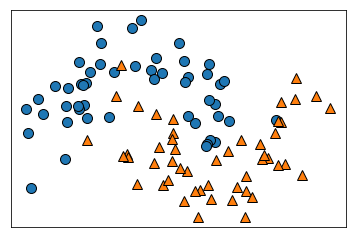

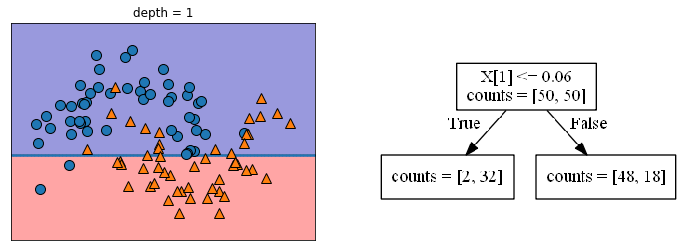

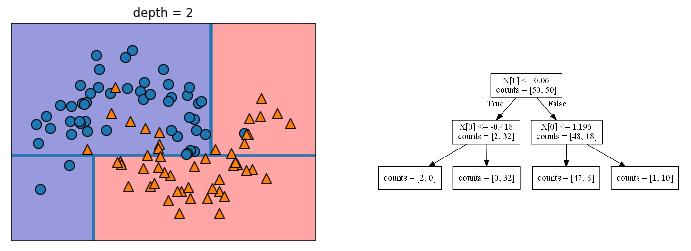

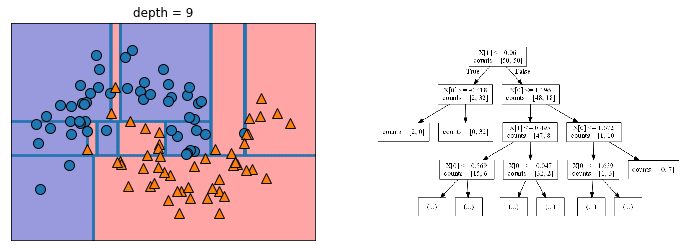

In [9]:
# now run this cell
%run plot_interactive_tree.py
plot_tree_progressive()

Now let's use a decision tree on a real dataset.

In [10]:
# load the breast cancer dataset. Separate it into
# a training and a test file

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [11]:
# compute the accuracy on training and test set. What can you 
# say about these scores ?
from sklearn.tree import DecisionTreeClassifier
model = fit_and_score(DecisionTreeClassifier, X_train, X_test, y_train, y_test, random_state=0)

building DecisionTreeClassifier model with 1 parameters: random_state = 0
 | score on train set: 1.0
 | score on test set: 0.8811188811188811


In [12]:
# look at the documentation of DecisionTreeClassifier() and
# train a model named tree that only has a depth of 4
model = fit_and_score(DecisionTreeClassifier, X_train, X_test, y_train, y_test, random_state=0, max_depth=4)

print("\nCool, we reduced overfitting!")

building DecisionTreeClassifier model with 2 parameters: random_state = 0 max_depth = 4
 | score on train set: 0.9929577464788732
 | score on test set: 0.9020979020979021

Cool, we reduced overfitting!


In [13]:
# now we can save the DecisionTreeClassifier model as a tree image.
from sklearn.tree import export_graphviz
export_graphviz(model, out_file="breast_tree.dot", 
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

In [14]:
# with ls, you can see that the file breast_tree.dot has been created
!dir

 Le volume dans le lecteur C s'appelle OS
 Le num‚ro de s‚rie du volume est CA00-30DB

 R‚pertoire de C:\Users\026\_data-analysis\session-3

03/12/2018  07:10    <REP>          .
03/12/2018  07:10    <REP>          ..
23/11/2018  16:00    <REP>          .ipynb_checkpoints
03/12/2018  07:12             2ÿ684 breast_tree.dot
30/11/2018  15:48             1ÿ539 datasets.py
03/12/2018  07:11            10ÿ410 first_model_boundaries.png
12/10/2018  14:45             1ÿ916 plots.py
12/10/2018  14:45             5ÿ295 plot_interactive_tree.py
03/12/2018  07:10           250ÿ317 session-3.ipynb
03/12/2018  07:12               929 tmp
03/12/2018  07:12            34ÿ117 tmp.png
               8 fichier(s)          307ÿ207 octets
               3 R‚p(s)  212ÿ006ÿ273ÿ024 octets libres


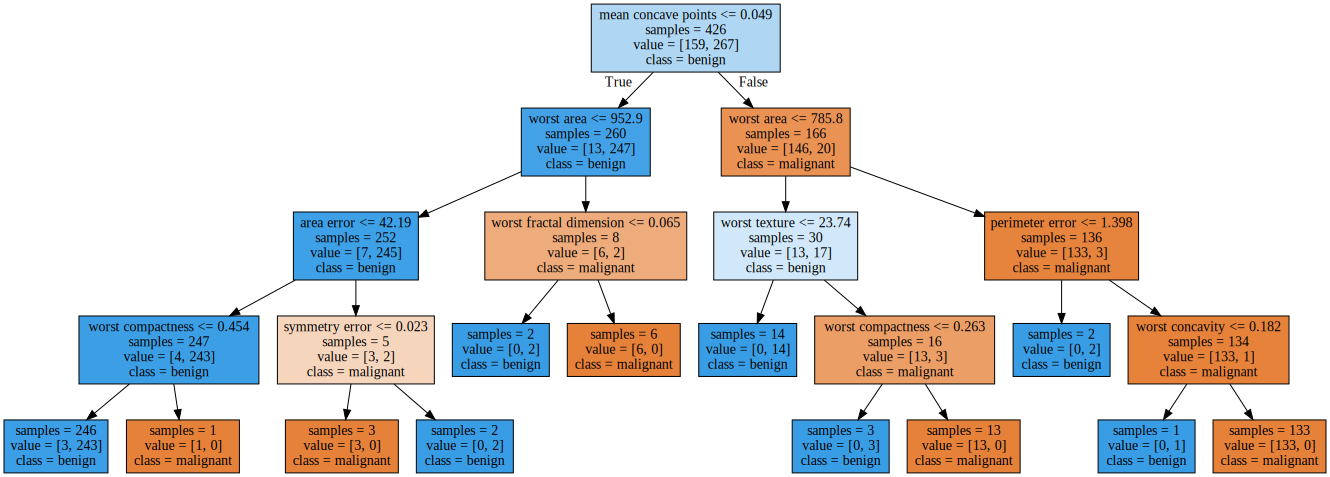

In [15]:
# we can visualize this .dot image with graphviz
import graphviz
with open("breast_tree.dot") as f:
    breast_tree = f.read()
graphviz.Source(breast_tree)

(0, 1)

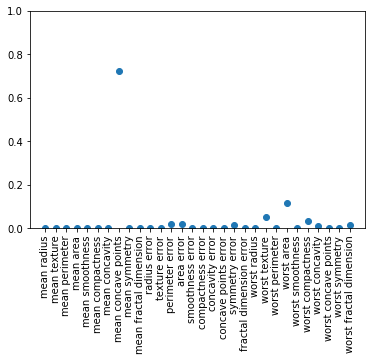

In [16]:
# we can visualize the importance of each feature
# learned by our model
#plt.figure(figsize=(10, 12))
plt.plot(model.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0,1)